In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## <font color='yellow'> Data Preparation</font>

In [79]:
# CABIN TYPE
# set the cabin class by stripping the first letter from cabin number
print(f"number of passengers without cabin class: {df['cabin'].isna().sum()}")
# replace NaN with U
df['cabin'] = df['cabin'].replace(np.NaN, 'U')
# get the first letter
df['cabin'] = df['cabin'].astype(str).str[0]
df['cabin'] = df['cabin'].replace('U', 'Unknown')
df['cabin'].value_counts()

number of passengers without cabin class: 1014


Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: cabin, dtype: int64

In [80]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [81]:
# OTHER FEATURES
df['isfemale'] = np.where(df['sex'] == 'female', 1, 0)

# drop some features
cols_to_drop = ['sex', 'name', 'boat', 'body', 'ticket', 'home.dest']
df.drop(cols_to_drop, axis=1, inplace=True)

# make pclass a categorical column
pclass_dic = {1:'First', 2:'Second', 3:'Third'}
df.replace({'pclass': pclass_dic}, inplace=True)

# replace na values
df['embarked'] = df['embarked'].replace(np.NaN, 'Unknown')

df.head()

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,isfemale
0,First,1,29.00,0,0,211.3375,B,S,1
1,First,1,0.92,1,2,151.5500,C,S,0
2,First,0,2.00,1,2,151.5500,C,S,1
3,First,0,30.00,1,2,151.5500,C,S,0
4,First,0,25.00,1,2,151.5500,C,S,1


In [84]:
# one hot encoding
def get_ohe(df_main, target_col, drop_first = True):
    # apply one hot endcoding for all categorical variables
    df_ohe = pd.get_dummies(df_main, columns=target_col, drop_first=drop_first)
    return df_ohe

# create OHE features
df_fin = get_ohe(df, target_col=['pclass', 'cabin', 'embarked'])
df_fin = df_fin.dropna()
df_fin.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'isfemale', 'pclass_First',
       'pclass_Second', 'pclass_Third', 'cabin_A', 'cabin_B', 'cabin_C',
       'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_Unknown',
       'embarked_C', 'embarked_Q', 'embarked_S', 'embarked_Unknown'],
      dtype='object')

In [130]:
from sklearn.model_selection import train_test_split
X = df_fin.loc[:, df_fin.columns != 'survived']
y = df_fin['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## <font color='orange'> Catboost</font>

In [151]:
from catboost import CatBoostClassifier
SEED = 42
params = {'loss_function':'Logloss',
           'eval_metric':'AUC',
           'verbose': 10
            }

cbc = CatBoostClassifier(**params)
cbc.fit(X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    plot=True
)

c:\Users\abbas\Desktop\myfiles\Git_Repos\CatB_Xgb\env\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.026988
0:	test: 0.8206725	best: 0.8206725 (0)	total: 1.77ms	remaining: 1.77s
10:	test: 0.8450750	best: 0.8471802 (6)	total: 19.7ms	remaining: 1.77s
20:	test: 0.8514351	best: 0.8531993 (18)	total: 38.5ms	remaining: 1.79s
30:	test: 0.8506419	best: 0.8531993 (18)	total: 56.4ms	remaining: 1.76s
40:	test: 0.8532734	best: 0.8533920 (39)	total: 75.3ms	remaining: 1.76s
50:	test: 0.8502046	best: 0.8533920 (39)	total: 92.5ms	remaining: 1.72s
60:	test: 0.8501453	best: 0.8533920 (39)	total: 110ms	remaining: 1.69s
70:	test: 0.8497598	best: 0.8533920 (39)	total: 125ms	remaining: 1.64s
80:	test: 0.8494188	best: 0.8533920 (39)	total: 142ms	remaining: 1.61s
90:	test: 0.8489222	best: 0.8533920 (39)	total: 158ms	remaining: 1.57s
100:	test: 0.8481365	best: 0.8533920 (39)	total: 174ms	remaining: 1.55s
110:	test: 0.8472914	best: 0.8533920 (39)	total: 190ms	remaining: 1.52s
120:	test: 0.8482032	best: 0.8533920 (39)	total: 206ms	remaining: 1.5s
130:	test: 0.8482032	best: 0.8533920 (39)	

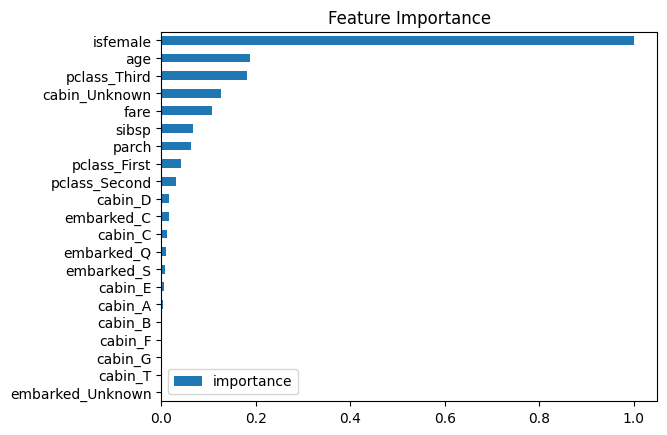

In [152]:
df_vi = pd.DataFrame(data=cbc.feature_importances_, index= cbc.feature_names_, columns=['importance']).sort_values('importance', ascending=True).copy()
df_vi['importance'] = df_vi['importance']/df_vi['importance'].max()
df_vi.plot(kind='barh', title='Feature Importance')
plt.show()

## <font color='yellow'>SHAP Analysis </font>

In [166]:
import shap
shap.initjs()
# fit the explainer
explainer = shap.Explainer(cbc.predict, X_test)
# calculate the SHAP values
shap_values = explainer(X_test)

iteritems is deprecated and will be removed in a future version. Use .items instead.
Permutation explainer: 524it [00:11,  6.36it/s]                         


In [181]:
df.head()

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,isfemale
0,First,1,29.00,0,0,211.3375,B,S,1
1,First,1,0.92,1,2,151.5500,C,S,0
2,First,0,2.00,1,2,151.5500,C,S,1
3,First,0,30.00,1,2,151.5500,C,S,0
4,First,0,25.00,1,2,151.5500,C,S,1


In [183]:
df_fin.head(40)

,survived,age,sibsp,parch,fare,isfemale,pclass_First,pclass_Second,pclass_Third,cabin_A,...,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_Unknown,embarked_C,embarked_Q,embarked_S,embarked_Unknown
0,1,29.00,0,0,211.3375,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0.92,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.00,1,2,151.5500,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,30.00,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,25.00,1,2,151.5500,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,48.00,0,0,26.5500,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,1,63.00,1,0,77.9583,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,0,39.00,0,0,0.0000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1,53.00,2,0,51.4792,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,71.00,0,0,49.5042,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


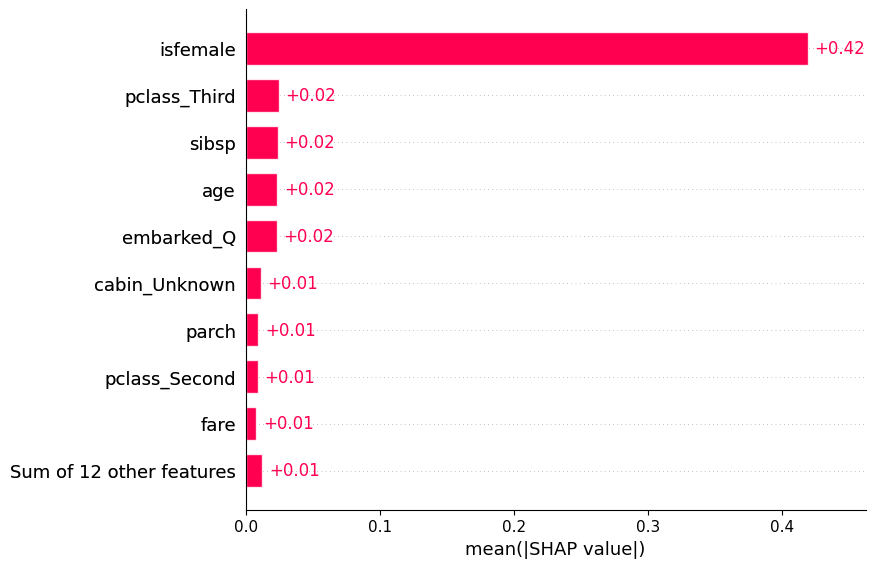

In [167]:
shap.plots.bar(shap_values)

In [180]:
# shap.summary_plot(shap_values)


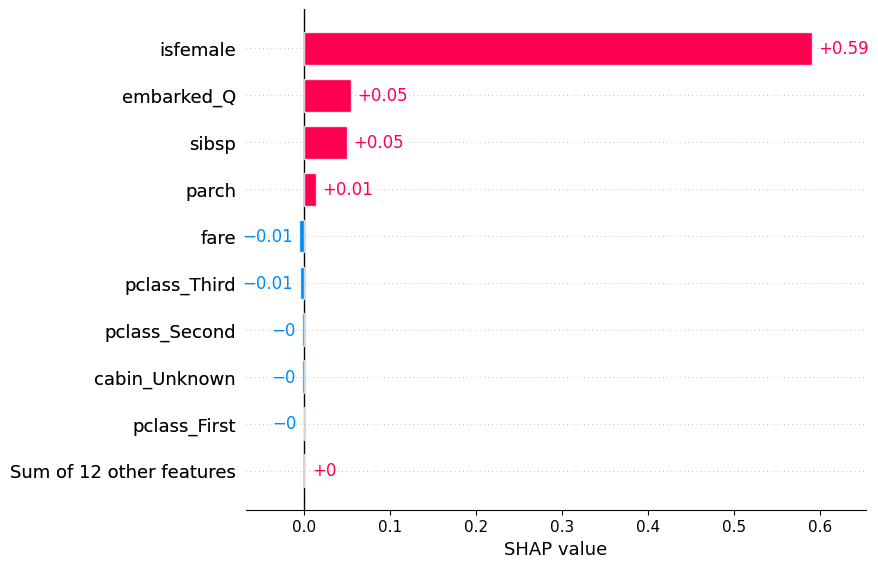

In [172]:
shap.plots.bar(shap_values[0])

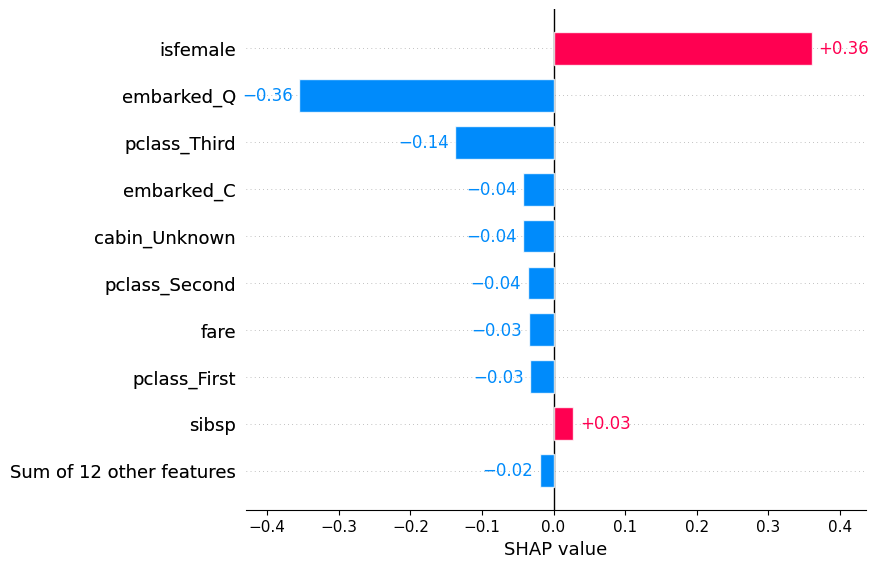

In [175]:
shap.plots.bar(shap_values[100])

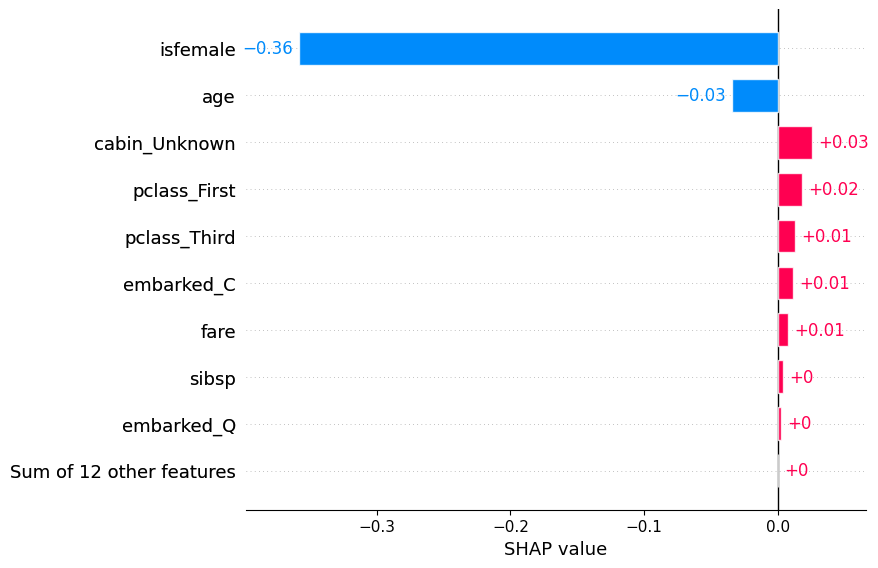

In [185]:
shap.plots.bar(shap_values[105])

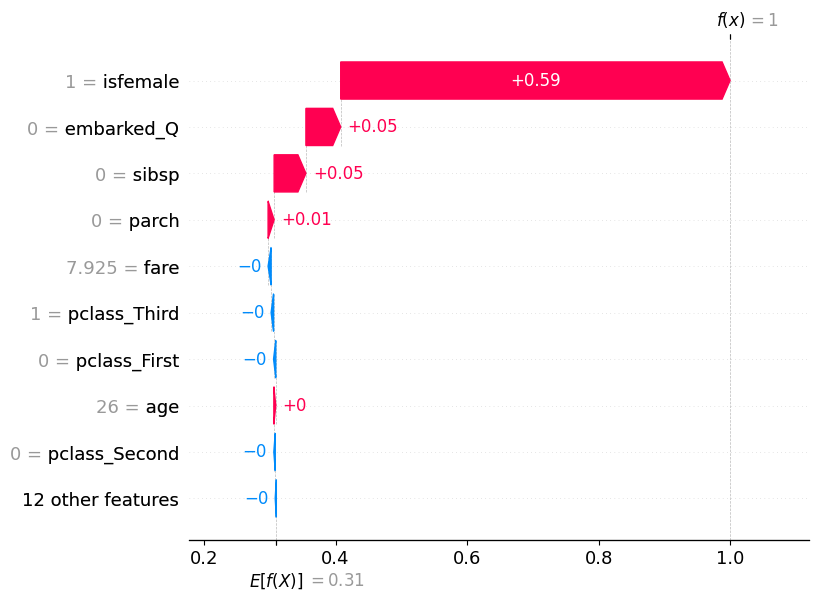

In [162]:
shap.plots.waterfall(shap_values[0])

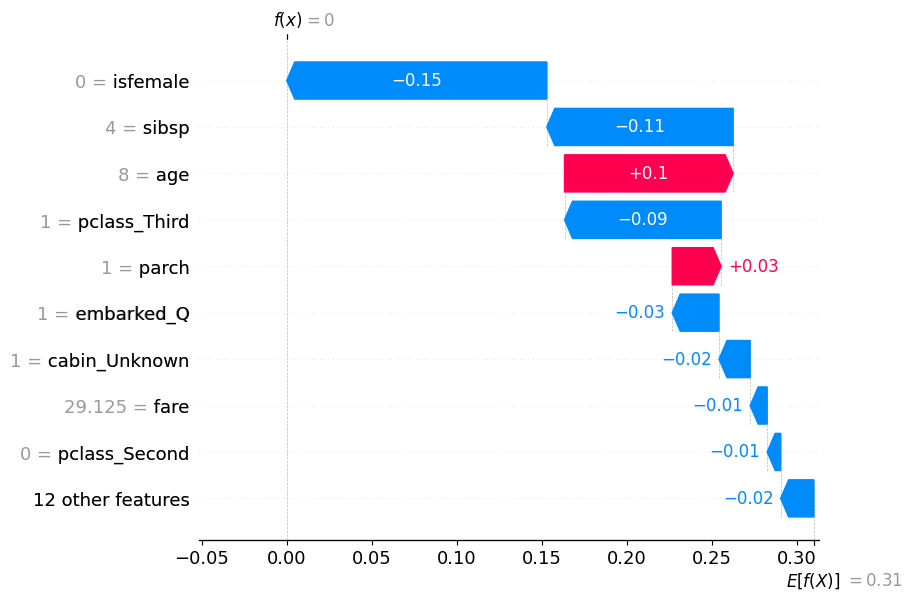

In [179]:
shap.plots.waterfall(shap_values[90])

In [165]:
shap.plots.force(shap_values[0])